In [10]:
from glob import glob
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

# File sorting

In [11]:
file_list = glob('/nvme0/fwi-forecast/ECMWF_FWI_2019*_1200_hr_fwi.nc')

Sorting files to get desired order when loaded.

In [12]:
files = sorted(file_list, key=lambda x: int(x[-19:-17])*100 + int(x[-17:-15]))[:184]; files

['/nvme0/fwi-forecast/ECMWF_FWI_20190401_1200_hr_fwi.nc',
 '/nvme0/fwi-forecast/ECMWF_FWI_20190402_1200_hr_fwi.nc',
 '/nvme0/fwi-forecast/ECMWF_FWI_20190403_1200_hr_fwi.nc',
 '/nvme0/fwi-forecast/ECMWF_FWI_20190404_1200_hr_fwi.nc',
 '/nvme0/fwi-forecast/ECMWF_FWI_20190405_1200_hr_fwi.nc',
 '/nvme0/fwi-forecast/ECMWF_FWI_20190406_1200_hr_fwi.nc',
 '/nvme0/fwi-forecast/ECMWF_FWI_20190407_1200_hr_fwi.nc',
 '/nvme0/fwi-forecast/ECMWF_FWI_20190408_1200_hr_fwi.nc',
 '/nvme0/fwi-forecast/ECMWF_FWI_20190409_1200_hr_fwi.nc',
 '/nvme0/fwi-forecast/ECMWF_FWI_20190410_1200_hr_fwi.nc',
 '/nvme0/fwi-forecast/ECMWF_FWI_20190411_1200_hr_fwi.nc',
 '/nvme0/fwi-forecast/ECMWF_FWI_20190412_1200_hr_fwi.nc',
 '/nvme0/fwi-forecast/ECMWF_FWI_20190413_1200_hr_fwi.nc',
 '/nvme0/fwi-forecast/ECMWF_FWI_20190414_1200_hr_fwi.nc',
 '/nvme0/fwi-forecast/ECMWF_FWI_20190415_1200_hr_fwi.nc',
 '/nvme0/fwi-forecast/ECMWF_FWI_20190416_1200_hr_fwi.nc',
 '/nvme0/fwi-forecast/ECMWF_FWI_20190417_1200_hr_fwi.nc',
 '/nvme0/fwi-f

*Approx 6 months*

In [13]:
len(files)

184

Saving the files in a separate location (once) to prevent unintended modification.

In [9]:
# import shutil
# for file in files:
#     shutil.copy(file, '/nvme0/data_deepfwi/fwi-forecast')

# Preprocessing

Each file contains the observation along with 9 day forecast.

In [31]:
xr.open_dataset(files[0], engine='h5netcdf').time

<xarray.DataArray 'time' (time: 10)>
array(['2019-04-01T00:00:00.000000000', '2019-04-02T00:00:00.000000000',
       '2019-04-03T00:00:00.000000000', '2019-04-04T00:00:00.000000000',
       '2019-04-05T00:00:00.000000000', '2019-04-06T00:00:00.000000000',
       '2019-04-07T00:00:00.000000000', '2019-04-08T00:00:00.000000000',
       '2019-04-09T00:00:00.000000000', '2019-04-10T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2019-04-01 2019-04-02 ... 2019-04-10
Attributes:
    standard_name:  time
    axis:           T

Selecting only the actual value

In [14]:
def preprocess(d):
    return d.isel(time=slice(0,1))

*h5netcdf* engine gives better I/O speed.

In [ ]:
proc = xr.open_mfdataset(files, preprocess=preprocess, engine='h5netcdf')

**Pixel resolution**: *2560x5120*<br>
**Longitude resolution**: 0.0703125<br>
**Latitude resolution**: 0.06971<br>
*Should match with fwi-forcings to not require interpolation*

In [16]:
proc

,Array,Chunk
Bytes,9.65 GB,52.43 MB
Shape,"(184, 2560, 5120)","(1, 2560, 5120)"
Count,736 Tasks,184 Chunks
Type,float32,numpy.ndarray


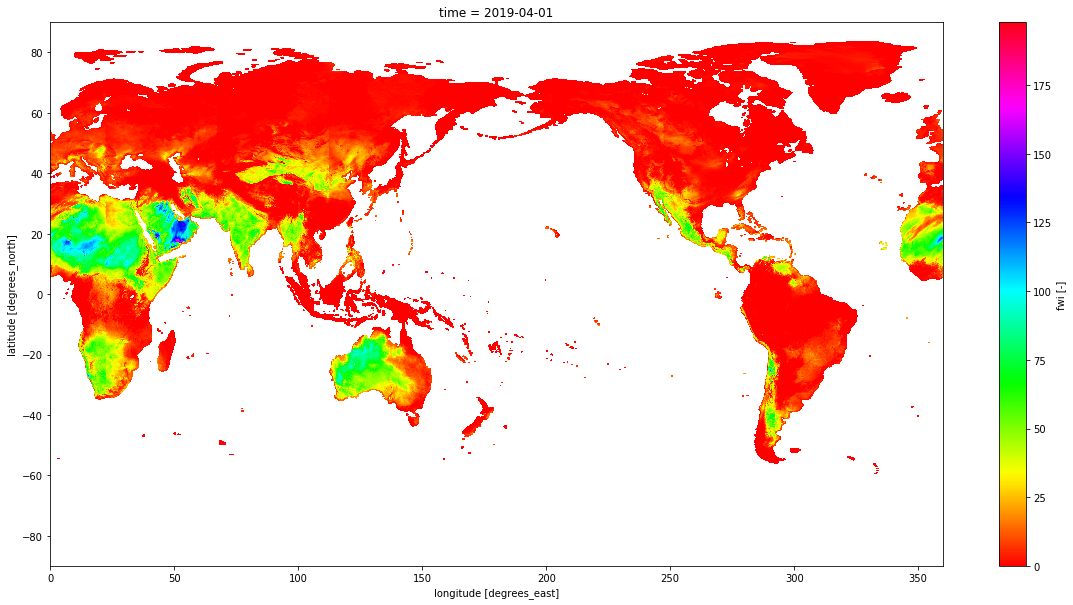

In [21]:
plt.figure(figsize = (20,10))
proc.fwi[0].plot(cmap='hsv')

Checking for NaN values.

In [33]:
np.isnan(proc.fwi[0].values).any()

True

Printing stats. The NaN values are skipped using `skipna`

In [147]:
def stats(x):
    tmp = x.mean(skipna=True).values
    print('mean', tmp)
    print('mad', abs(x-tmp).mean(skipna=True).values)
    print('var', x.var(skipna=True).values)
    print('min', x.min(skipna=True).values)
    print('max', x.max(skipna=True).values)

In [148]:
stats(proc.fwi)

mean 18.389227
mad 20.80943
var 716.1736
min 1.72531e-09
max 438.3116
